# WEEK 13 (22/01/18)

# Done
* Rewrote eps_scale in object-oriented style
* 

### To Do
* Give population all 1 to pull out mass dependencies and plot to see
* Store DMs for a few cities

### Questions
* <font color='green'>  </font> 

## 1. Uniform mass distribution

Since we now have too many variables that $\epsilon$ might depend on, let's try and simplify by using a uniform mass distribution ($m_i = 1  \forall i$). This way, we can pick out the mass dependencies by comparing the $\epsilon$ plots to what we did last week (see Notebook *Week 12*).

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from hm.analysis.scaling import eps_scale
from matplotlib import pyplot as plt
import pandas

In [17]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/LSOA populations and areas 2011 (merged).csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]
lon_df['TotPop2011'] = 1
lon_df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Unnamed: 0,CODE,Name,TotPop2011,HouPop2011,HHCnt2011,Easting,Northing,Area
15785,15785,E01023906,Watford 001C,1,1485,630,510439,200611,2.317704e+05
15786,15786,E01023907,Watford 001D,1,1689,753,510053,200394,4.847562e+05
15787,15787,E01023904,Watford 001A,1,1985,777,510678,201163,3.099585e+05
15789,15789,E01023905,Watford 001B,1,1882,842,511227,200844,6.531726e+05
15791,15791,E01023902,Watford 010D,1,1510,613,510881,195800,3.854535e+05
15793,15793,E01023903,Watford 010E,1,1554,549,510177,195901,9.469995e+04
15795,15795,E01023900,Watford 010B,1,1728,557,510047,196143,1.091049e+05
15797,15797,E01023901,Watford 010C,1,1909,720,510490,195906,2.003893e+05
15801,15801,E01023908,Welwyn Hatfield 015A,1,1542,599,524464,204252,1.851029e+06
15802,15802,E01023909,Welwyn Hatfield 015B,1,1179,418,525321,203965,2.745573e+06


In [11]:
d_max = [300, 500, 700, 1000, 1300]
gamma = 2

In [12]:
levels = eps_scale.iterate(lon_df, d_max)
level_1 = levels[0]
level_2 = levels[1]
level_3 = levels[2]
level_4 = levels[3]
level_5 = levels[4]

In [20]:
level_1.pop.popDist
level_2.pop

array([1, 1, 1, ..., 1, 1, 1])

### 1.1 Level 1

In [14]:
eps_level_1 = eps_scale.epsilon(levels, 1, gamma)

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


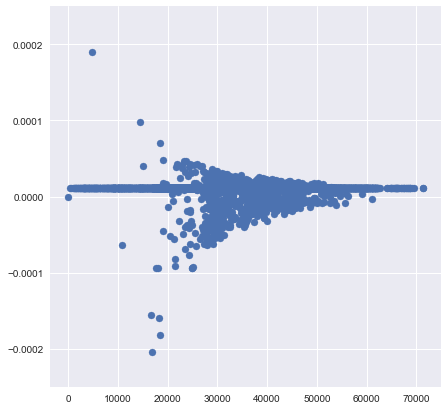

In [16]:
width = 7
height = 7
plt.figure(figsize=(width, height))
x = eps_scale.cluster_population(level_1).DM[100][1:] #distance of location 20 with all the others
y = eps_level_1[100][1:]
plt.ylim(-0.00025, 0.00025)
plt.scatter(x, y)
plt.show()

Something weird here, it looks exactly the same as before. 

Is it actually independent of masses? Or are we doing something wrong? Maybe we can have a look at the ODMs to get a better idea.

### 1.2 Level 2

In [ ]:
eps_level_2 = eps_scale.epsilon(levels, 2, gamma)